In [ ]:
#Social_Network_Ads.csv

**Importing the libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

**Importing the dataset**

In [3]:
data=pd.read_csv("Social_Network_Ads.csv")
df=pd.DataFrame(data)
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


**Splitting the dataset into the Training set and Test set**

In [4]:
X=df[["Age","EstimatedSalary"]]
y=df["Purchased"]

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=0)

**Feature Scaling**

In [52]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
pipe=Pipeline([("scaler",StandardScaler()),("tree",DecisionTreeClassifier(max_depth=2))])

**Fitting Decision Tree Classification to the Training set**

In [53]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('tree', DecisionTreeClassifier(max_depth=2))])

**Predicting the Test set results**

In [54]:
y_pred=pipe.predict(X_test)
predicted=pd.DataFrame({"Actual":y_test,"Pred":y_pred})
predicted

,Actual,Pred
132,0,0
309,0,0
341,0,0
196,0,0
246,0,0
...,...,...
216,0,1
259,1,1
49,0,0
238,0,1


**Making the Confusion Matrix**

In [55]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[72,  7],
       [ 3, 38]])

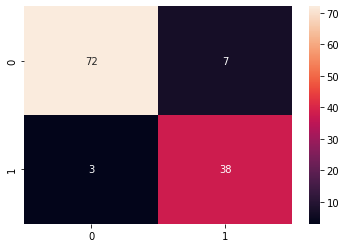

In [56]:
sns.heatmap(cm,annot=True)

In [57]:
pipe.score(X_test,y_test)

0.9166666666666666

** *italicised text*Visualising the Training set results**

**Visualising the Test set results**

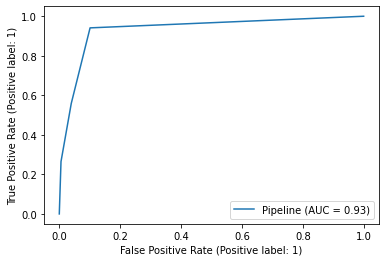

In [58]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(pipe,X_train,y_train)

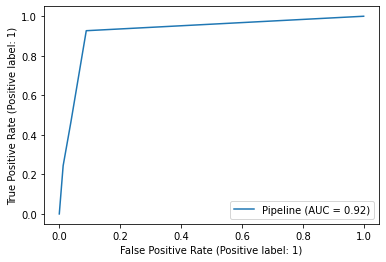

In [59]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(pipe,X_test,y_test)

In [60]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
rang=range(1,10)
train_accuracy=[]
crossval=[]
for i in rang:
  dt = DecisionTreeClassifier(max_depth = i)
  dt.fit(X_train,y_train) 
  y_hat = dt.predict(X_train)
  train_accuracy.append(accuracy_score(y_train,y_hat))
  crossval.append(cross_val_score(dt,X_train,y_train,cv=10))

In [43]:
train_accuracy

[0.8285714285714286,
 0.9142857142857143,
 0.9178571428571428,
 0.9321428571428572,
 0.9428571428571428,
 0.9678571428571429,
 0.9714285714285714,
 0.975,
 0.9857142857142858]

In [49]:
for i in crossval:
  print(i.mean())

0.8214285714285714
0.9071428571428571
0.8714285714285713
0.875
0.8571428571428571
0.8535714285714286
0.8535714285714286
0.8607142857142858
0.8571428571428571


It seems maximum depth 2 gives the highest prediction.